# Iteration test
This file demonstrates how to initialize an Equilibrium object from leading order quantities and tests its accuracy.

In [1]:
# This file implements and tests recursion relations
import numpy as np
import timeit
import scipy.signal
from matplotlib import pyplot as plt
from numba import jit, njit, prange
from numba import complex128, int64    # import jit value types
from functools import lru_cache # import functools for caching
import warnings

# for importing parsed codes
import sys
sys.path.insert(1,'../python_source/MHD_parsed/')
sys.path.insert(1,'../python_source/')
from chiphifunc import *
from math_utilities import *
from chiphiepsfunc import *
from chiphifunc_test_suite import *
from equilibrium import *
debug_path = '../test_data_eduardo/'

Detected 16 CPU's. Setting n_jobs to #CPU/2.


Axis shape:


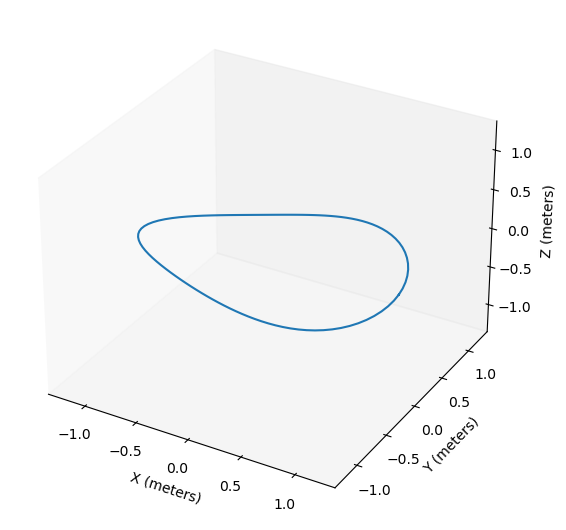

In [2]:
# No B theta
B_psi_coef_cp, B_theta_coef_cp, \
    Delta_coef_cp, p_perp_coef_cp,\
    X_coef_cp, Y_coef_cp, Z_coef_cp, \
    iota_coef, dl_p,\
    nfp, Xi_0, eta, \
    B_denom_coef_c, B_alpha_coef, \
    kap_p, tau_p = read_first_three_orders(
        debug_path+'5.2/', 
        R_array=[4,0,1,2,0.173,0,4,0.0168,0,6,0.00101,0],
        Z_array=[3,2,0,0.159,4,0,0.0165,6,0,0.000987]
    )
B_theta_coef_cp = B_theta_coef_cp.zero_append().zero_append()

## Initializing an `Equilibrium`
### Required quantities and orders
Unknowns:

1. X_coef_cp: 2
2. Y_coef_cp: 2
3. Z_coef_cp: 2
4. B_psi_coef_cp: 0
5. B_theta_coef_cp: 2
6. iota_coef: 0
7. Delta_coef_cp: 3
8. p_perp_coef_cp: 3

Known constants:
1. B_denom_coef_c: 2
2. B_alpha_coef: 1
3. kap_p
4. dl_p 
5. tau_p
6. eta

In [3]:
equilibrium = Equilibrium.from_known(
    X_coef_cp=X_coef_cp.mask(2),
    Y_coef_cp=Y_coef_cp.mask(2),
    Z_coef_cp=Z_coef_cp.mask(2),
    B_psi_coef_cp=B_psi_coef_cp.mask(0),
    B_theta_coef_cp=B_theta_coef_cp.mask(2),
    B_denom_coef_c=B_denom_coef_c.mask(2),
    B_alpha_coef=B_alpha_coef.mask(1),
    iota_coef=iota_coef.mask(0), 
    kap_p=kap_p, 
    dl_p=dl_p, 
    tau_p=tau_p,
    eta=eta,
    p_perp_coef_cp = ChiPhiEpsFunc([0,0,0]), # no pressure or delta
    Delta_coef_cp = ChiPhiEpsFunc([0,0,0]))

## Iterate 2 orders using only the magentic equations

In [4]:
equilibrium = equilibrium.iterate_2_magnetic_only(
        B_theta_nm1=0, B_theta_n=0,
        B_psi_nm20=0,
        B_alpha_nb2=0,
        B_denom_nm1=0, B_denom_n=0,
        Y_free_n=0,
        p_perp_nm1=0, p_perp_n=0,
        Delta_nm1=0, Delta_n=0)

Evaluating order 3 4
Time elapsed(s): 1.5393702983856201


## Accessing data and checking accuracy

X_3


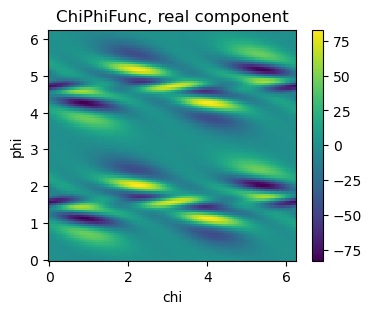

Y_3


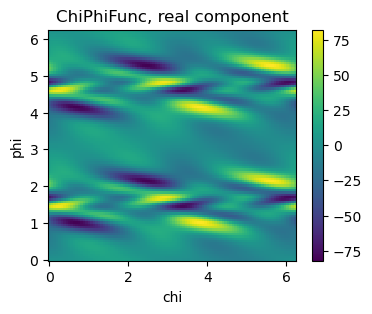

In [5]:
X3_from_equilibrium = equilibrium.unknown['X_coef_cp'][3]
Y3_from_equilibrium = equilibrium.unknown['Y_coef_cp'][3]
print('X_3')
X3_from_equilibrium.display()
print('Y_3')
Y3_from_equilibrium.display()

X_3 accuracy
Difference


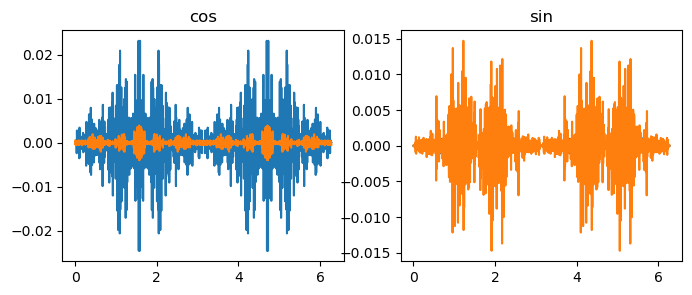

fractional errors b/w data and general formula
Error type:     Fractional      Total          
Avg:            1.105e-03       1.315e-03      
Worst:          1.622e-01       1.226e-02      
Std             8.122e-03       1.906e-03      
Total imaginary component
0.0

Y_3 accuracy
A


/Users/lanke/Desktop/Second year project/Code/python_source/chiphifunc_test_suite.py:96: ComplexWarning: Casting complex values to real discards the imaginary part
  A_content_padded[a_pad_row:shape[0]-a_pad_row,a_pad_col:shape[1]-a_pad_col] = A.content
/Users/lanke/Desktop/Second year project/Code/python_source/chiphifunc_test_suite.py:97: ComplexWarning: Casting complex values to real discards the imaginary part
  B_content_padded[b_pad_row:shape[0]-b_pad_row,b_pad_col:shape[1]-b_pad_col] = B.content


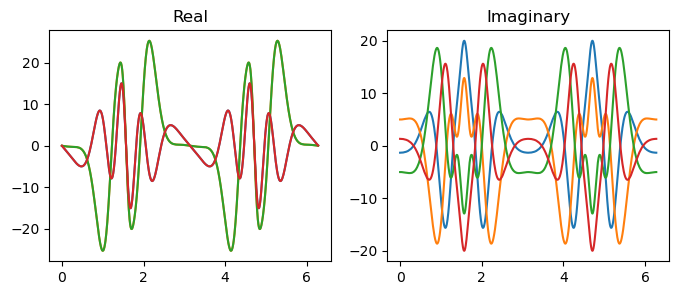

B


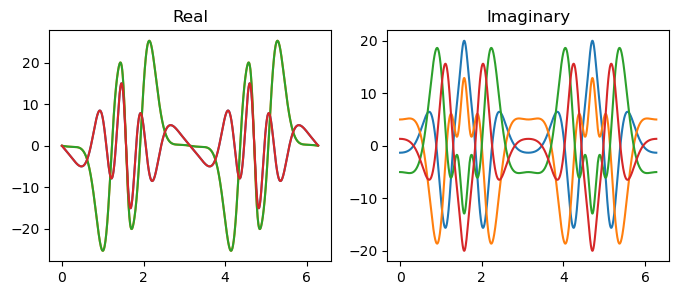

Difference


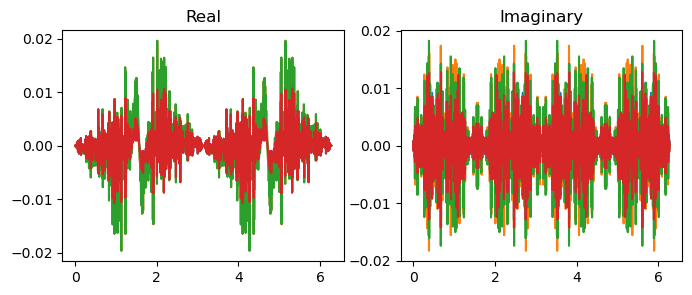

fractional errors b/w data and general formula
Error type:     Fractional      Total          
Avg:            inf             3.017e-03      
Worst:          inf             1.961e-02      
Std             nan             3.296e-03      
Total imaginary component
0.0



/Users/lanke/Desktop/Second year project/Code/python_source/chiphifunc_test_suite.py:105: RuntimeWarning: divide by zero encountered in true_divide
  frac = np.abs((guess-ans)/ans)
/Users/lanke/anaconda3/envs/nae/lib/python3.10/site-packages/numpy/core/_methods.py:230: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [6]:
X3_benchmark = X_coef_cp[3]
Y3_benchmark = Y_coef_cp[3]
print('X_3 accuracy')
compare_chiphifunc(X3_from_equilibrium,X3_benchmark)
print('Y_3 accuracy')
compare_chiphifunc(Y3_from_equilibrium,Y3_benchmark, fourier_mode=False, simple_mode=False)